# Volume 4: Inverse Problems
    <Name>
    <Class>
    <Date>

In [2]:
import numpy as np
from scipy.optimize import minimize
import matplotlib.pyplot as plt
from scipy.integrate import quad

# Problem 1

Solve (16.2) for a(x).
Produce the plot shown in Figure 16.2.

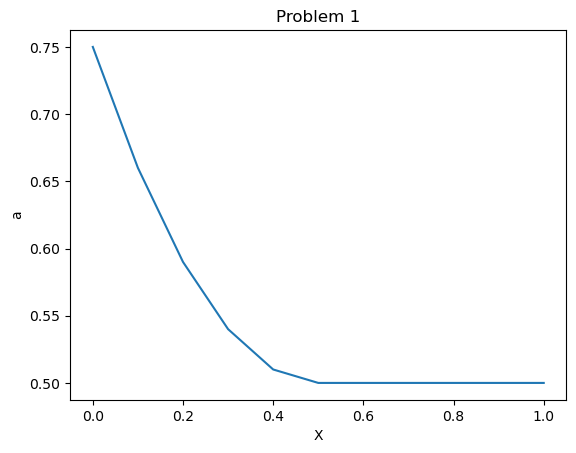

In [3]:
# Define constants
c0 = 3/8
c1 = 5/4

# Define function u
def u(x):
    return x**2 + x/2 + 5/16

# Define derivative of u
def u_prime(x):
    return 2*x + 1/2

# Define what x values we are using
x_vals = (1/10)*np.arange(11)

# Define the f function
def f(x):
    if x <= 0.5:
        return -6*x**2 + 3*x - 1
    else:
        return -1

# Define the minimizer function
def minimizer(a,x):  
    first_val = ((c0 - quad(f, 0, x)[0])/a  - u_prime(x))**2
    return first_val

# Get the argmins for each value of x
a_values = []
for x in x_vals:
    argmin = minimize(minimizer, 0.6, args = (x)).x[0]
    a_values.append(argmin)

# Plot values  
plt.plot(x_vals, a_values)
plt.xlabel('X')
plt.ylabel('a')
plt.title('Problem 1')
plt.show()


    


# Problem 2

Find the density function a(x). Using several values of ε > 0.66049142, plot the corresponding
density a(x) for x in np.linspace(0,1,11) to demonstrate that the problem is ill-posed.

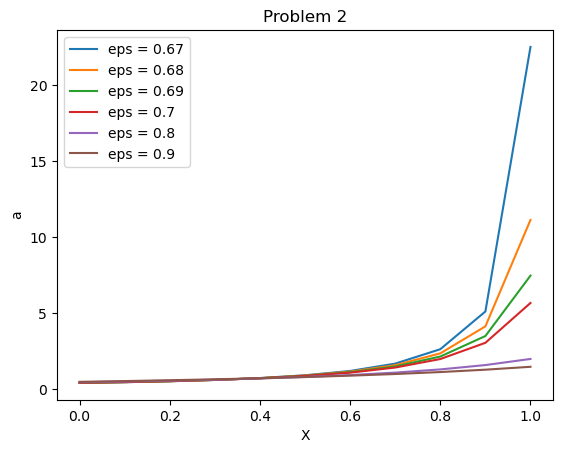

In [4]:
# Define constants
c0 = 1
c1 = 2

# Define function u
def u(x,eps):
    return x + 1 + eps * np.sin(eps**(-2)*x)
   
# Define derivative of u 
def u_prime(x,eps):
    return 1 + (1/eps)*np.cos(eps**(-2)*x)

# Define what x values we are using 
x_vals = np.linspace(0,1,11)

# Define the f function
def f(x):
    return -1


# Define the minimizer function
def minimizer(a,x,eps):  
    first_val = ((c0 - quad(f, 0, x)[0])/a  - u_prime(x,eps))**2
    return first_val

# Get the argmins for each value of x and for every eps
for eps in [0.67,0.68,0.69,0.7,0.8,0.9]:
    a_values =[]
    for x in x_vals:
        argmin = minimize(minimizer, 0.6, args = (x,eps)).x[0]
        a_values.append(argmin)

    # Plot values  
    plt.plot(x_vals, a_values, label = f'eps = {eps}')
    plt.xlabel('X')
    plt.ylabel('a')
    plt.title('Problem 2')

# Show plots
plt.legend()
plt.show()


# Problem 3
The file measured_heat.npy contains measurements of the temperature along an insulated rod over time, with the first row corresponding to the initial state of the heat distribution in the rod. Use this first row as the initial state of the heat distribution when solving for $U$ with a given vector $\nu$. 
The rod has a varying diffusion coefficient $\nu(x)$. Use equations in the lab, to find a good estimate of $\nu$.
Plot your estimated $\nu$ along with the true $\nu$, which is given by

$\nu(x) = \frac{5}{1+e^{-x}}+\frac{1}{2}$.

In [66]:
U_measured = np.load('measured_heat.npy') # This is a MxJ matrix of measured data with noise

# Get the shape of the measured data
M, J = U_measured.shape

# Get the step sizes
x, h = np.linspace(-10,10,11, retstep= True)
t, k = np.linspace(0,2,21, retstep= True)

# Initialize the U matrix
U = np.zeros((M,J))
# Define the initial condition
U[0,:] = U_measured[0,:]

def J_min(nu, U_measured):
    # Loop forward in time to solve for U with the specified nu vector using equation 8
    for time in range(M-1):
        U[time+1][1:-1] = U[time][1:-1] + (k / h**2) * (nu[1:-1] * (U[time][2:] - 2 * U[time][1:-1] + U[time][:-2]) + ((nu[2:] - nu[:-2]) * (U[time][2:] - U[time][:-2])) / 4)

    # Return the total error
    total_error = np.sum((U - U_measured) ** 2)
    return total_error

# This is a good guess. There are other ones that will work fine too.
guess = np.ones(J) * 2

# Get the minimizer
sol = minimize(J_min, guess, args=(U_measured,), method='BFGS')
nu = sol.x



21 11
Optimal nu: [184.75228136  33.29630608   9.00064035   2.82599173   2.00703182
   3.04623497   6.05246067   8.16157421  12.55300513  21.37300111
  33.11924311]


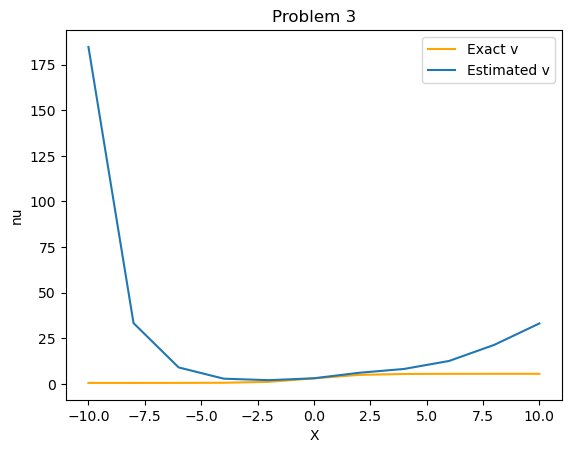

In [68]:
# Make a function for the true v(x)
def true_v(x):
    return 5/(1+np.exp(-x)) + 0.5

# Define the linspace and function for the true v(x)
X = np.linspace(-10,10.0001,11)
V_X = true_v(X)

# Plot the true v(x) and the estimated v(x)
plt.plot(X,V_X, color = 'orange', label = "Exact v")
plt.plot(X, nu, label = "Estimated v")
plt.xlabel('X')
plt.ylabel('nu')
plt.title('Problem 3')
plt.legend()
plt.show()